In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [28]:
df1 = pd.read_csv('datasets/daily-total-female-births-in-cal.csv')
df2 = pd.read_csv('datasets/mean-monthly-air-temperature-deg.csv')
df3 = pd.read_csv('datasets/monthly-boston-armed-robberies-j.csv')
df4 = pd.read_csv('datasets/monthly-sales-of-company-x-jan-6.csv')
df5 = pd.read_csv('datasets/weekly-closings-of-the-dowjones-.csv')

In [29]:
def display_data(*datas):
    for data in datas:
        display(data.head(4))
        display(data.info())
        display(data.isna().mean())
        display(data.duplicated().sum())

display_data(df1, df2, df3, df4, df5)

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Count   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


None

Date     0.0
Count    0.0
dtype: float64

0

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   240 non-null    object 
 1   Deg     240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


None

Month    0.0
Deg      0.0
dtype: float64

0

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   118 non-null    object
 1   Count   118 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


None

Month    0.0
Count    0.0
dtype: float64

0

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   77 non-null     object
 1   Count   77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


None

Month    0.0
Count    0.0
dtype: float64

0

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Week    162 non-null    object 
 1   Close   162 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


None

Week     0.0
Close    0.0
dtype: float64

0

In [30]:
def date_format(*dfs):
    for df in dfs:
        for col in df.columns:
            if 'Date' in col:
                df[col] = pd.to_datetime(df[col])
                df.set_index('Date', inplace=True)
            elif 'Month' in col:
                df[col] = pd.to_datetime(df[col], format='%Y-%m')
                df.set_index('Month', inplace=True)
            elif 'Week' in col:
                df[col] = df[col].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-W%W-%w"))
                df.set_index('Week', inplace=True)
            else:
                pass
        df.info()


df_date = date_format(df1, df2, df3, df4, df5)

df_date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deg     240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


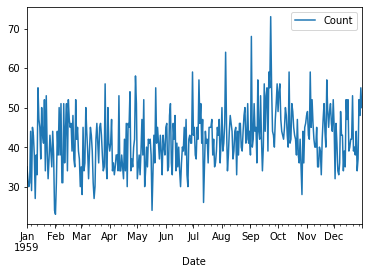

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


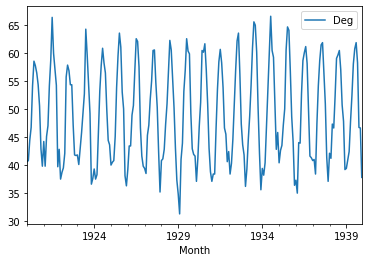

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Ряд нестационарный (данные имеют единичный корень)


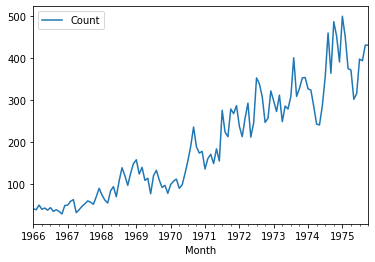

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд нестационарный (данные имеют единичный корень)


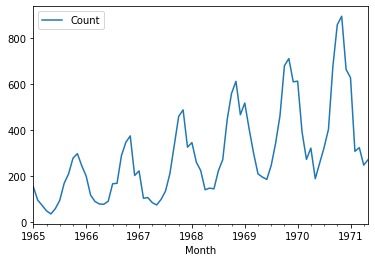

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Ряд нестационарный (данные имеют единичный корень)


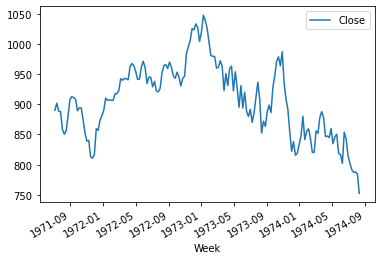

  
-------------------


In [25]:
def test_stationarity(*dfs):
    for df in dfs:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(df, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for [key, value] in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        if dfoutput['Test Statistic'] > dfoutput['Critical Value (5%)']:
            print("Ряд нестационарный (данные имеют единичный корень)")
        else:
            print("Ряд стационарный (данные не имеют единичного корня)")
        
        df.plot()
        plt.show()
        print('  ')
        print('-------------------')
                
test_stationarity(df1, df2, df3, df4, df5)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


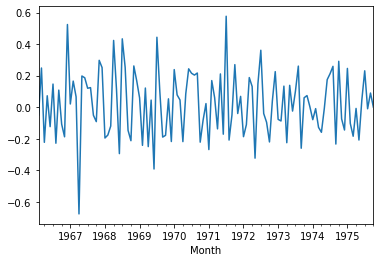

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


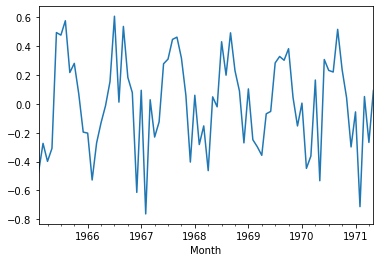

  
-------------------
Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
Ряд стационарный (данные не имеют единичного корня)


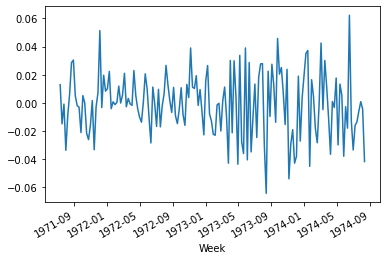

  
-------------------


In [26]:
def log_diff(*dfs):
    result = []
    for df in dfs:
        df_copy = df.copy()  
        for col in df_copy.columns:
            if 'Count' in col or 'Deg' in col or 'Close' in col:
                df_copy[col] = np.log(df_copy[col])
                df_copy[col] = df_copy[col].diff()
                df_copy = df_copy[col].dropna()
        result.append(df_copy)        
    return result

df_log = log_diff(df3,df4,df5)
for df in df_log:
    test_stationarity(df)